<a href="https://colab.research.google.com/github/wenxuan0923/My-notes/blob/master/Eigenv_intuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intuition behind Eigenvalue, Eigenvector and Eigendecomposition

In this note I will explain the intuition behind **eigenvalue**, **eigenvector**, and **eigendecomposition** using visualization, and show you how to calculate them using Numpy. These concepts are very important for us to understand methods like Singular Value Decomposition, Latent Matrix Factorization, Principal Component Analysis and a lot more.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn-whitegrid')

First thing first, we need to understand **matrix multiplication** defined as:

<br>$$\mathbf{C_{(m*n)}} = A_{(m*p)}X_{(p*n)}$$ <br>

Specificlly, the item on the i-th row and j-th column in $\mathbf{C}$ is defined as:

<br>$$\mathbf{C_{i,j}} = \sum_{k=1}^{p}A_{i,k}X_{k,j}$$

## Single vector transformation

To simply things a bit, we start with the case where $x$ is a single vector.

<br>$$\mathbf{C_{(m*1)}} = A_{(m*p)}x_{(p*1)}$$ <br>

We can think of a matrix $\mathbf{A}$ as a **transformation** that acts on a $p$-dimentional vector $x$ by multiplication to produce a $m$-dimentional new vector $\mathbf{A}x$. We will use python to visualize these transformations.

**Helper function to visualize single vector transformation**

In [1]:
def viz_single_trans(orignal_data, scaled_data, title=''):
  origin = [0], [0]   # origin point
  f, ax = plt.subplots(figsize=(6, 5))  
  x, y = orignal_data[0], orignal_data[1] 
  t_x, t_y = scaled_data[0], scaled_data[1] 
  ax.quiver(*origin, x, y, 
            color='b', scale_units='xy', 
            width=0.01, angles='xy', scale=1)
  ax.quiver(*origin, t_x, t_y, 
            color='r', scale_units='xy', 
            width=0.01, angles='xy', scale=1)
  ax.text(x + 0.1, y + 0.1, "$\mathbf{x}$", color='b', fontsize=14)
  ax.text(t_x + 0.1, t_y + 0.1, "$\mathbf{t}$", color='r', fontsize=14)
  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])
  ax.set_aspect('equal')
  ax.axhline(y=0, color='k')
  ax.axvline(x=0, color='k')
  ax.set_title(title)
  plt.show()

**Case 1: Rotation Matrix** 

$$A = \begin{bmatrix}
cos(\theta) & -sin(\theta) \\
sin(\theta) & cos(\theta)
 \end{bmatrix}$$

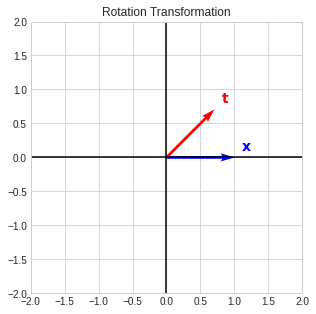

In [3]:
# orignal vector
x = np.array([1, 0])  
# 45 degrees in radian
theta = (45*np.pi)/180   
# Rotation matrix for 45 degrees
A = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]]) 
# the rotated vector
Ax = np.matmul(A, x)
viz_single_trans(x, Ax, title='Rotation Transformation')

In this example, the multiplication with matrix A rotates the original vector $(1,0)$ by 45 degree (counterclockwisely) and its magnitude remain unchanged.

**Case 2: Streching Matrix in x-direction**

$$B = \begin{bmatrix}
m & 0 \\
0 & 1
\end{bmatrix}$$

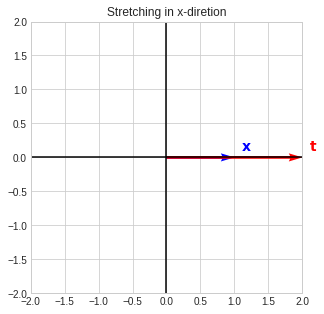

In [4]:
x = np.array([1, 0])  
B = np.array([[2, 0], 
              [0, 1]]) 
# the stretched vector
Bx = np.matmul(B, x)  
viz_single_trans(x, Bx, title='Stretching in x-diretion')

In this example, the multiplication with matrix $\mathbf{B}$ does not change the direction of vector $(1, 0)$ but only stretches it. This is the same with multiplying the vector with a scaler value. In this example, we can simply represent the transformation as:

<br> $$Bx = 2x$$ 

**Case 3: Streching Matrix in y-direction**


$$C = \begin{bmatrix}
1 & 0 \\
0 & n
\end{bmatrix}$$

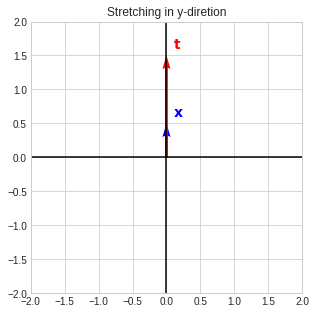

In [ ]:
x = np.array([0, 0.5])  
C = np.array([[1, 0], 
              [0, 3]]) 
# the stretched vector
Cx = np.matmul(C, x)  
viz_single_trans(x, Cx, title='Stretching in y-diretion')

Similarly, in the case above the matrix $\mathbf{C}$ does not change the direction of vector $(0, 0.5)$ but only stretches it. Again, it can be represented as:

$$Cx = 3x$$ <br>

However, this is not always the case. Check the following examples:

**Case 4: Both Streching and Rotation**


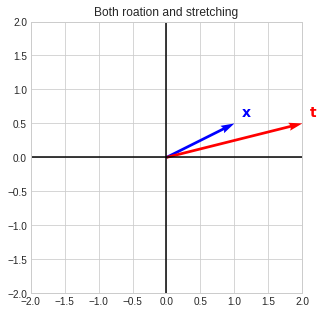

In [ ]:
x = np.array([1, 0.5])  
Bx = np.matmul(B, x)  
viz_single_trans(x, Bx, title='Both roation and stretching')

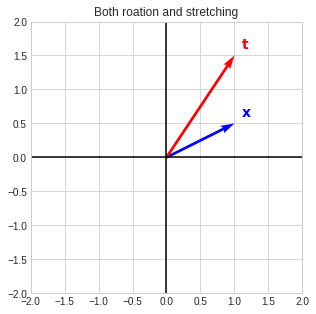

In [ ]:
x = np.array([1, 0.5])  
Cx = np.matmul(C, x)  
viz_single_trans(x, Cx, title='Both roation and stretching')

In these two examples, we apply the same matrixes $\mathbf{B}$ and $\mathbf{C}$ to a different vector $(1, 0.5)$, it turns out change both the direction and the magnitude of this vector. This is because the general effect of matrix on the vectors is a **combination of rotation and stretching**. However, for each matrix $\mathbf{M}$, there exists some vectors who have this property that multipling with $\mathbf{M}$ have the same effect with multipling an scaler $\lambda$: 

$$Mx = \lambda x$$ <br>


These vectors $x$ are called the **eigenvectors** of $\mathbf{M}$, and their corresponding scalar quantity $\lambda$ is called an **eigenvalue** of $\mathbf{M}$ for that eigenvector. This idea can be better understood with groups of vectors transformation below.

## Transformation of group of vectors

Now, instead of applying transformation on a single vector, we can apply on a group of vectors. 

Here I will be using the unit circle defined by $(cos(\theta), sin(\theta))$ where $\theta \in [0, 2\pi]$ for illustration.

**Helper function to visualize group transformation**

In [5]:
def viz_group_trans(orignal_data, scaled_data):
  origin = [0], [0]   # origin point
  fig = plt.figure(figsize=(10, 15)) 
  def _plot(ax, x1, y1, x2, y2, isorigin):
    label = 'x' if isorigin else 't'
    color = 'b' if isorigin else 'r'
    ax.quiver(*origin, x1, y1, 
              color=color, scale_units='xy', 
              width=0.01, angles='xy', scale=1)
    ax.quiver(*origin, x2, y2, 
              color=color, scale_units='xy', 
              width=0.01, angles='xy', scale=1)
    if isorigin:
      ax.plot(orignal_data[:,0], orignal_data[:,1])
    else:
      ax.plot(scaled_data[:,0], scaled_data[:,1])
    ax.set_title("After transformation")
    ax.text(x1 + 0.2, y1 + 0.1, "$\mathbf{"+label+"_1}$", color=color, fontsize=14)
    ax.text(x2 + 0.2, y2 + 0.1, "$\mathbf{"+label+"_2}$", color=color, fontsize=14)
    ax.set_aspect('equal')
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])

  ax1 = fig.add_subplot(1, 2, 1)  
  x1, y1 = orignal_data[0, 0], orignal_data[0, 1]  # random example 1
  x2, y2 = orignal_data[90, 0], orignal_data[90, 1]  # random example 2
  _plot(ax1, x1, y1, x2, y2, isorigin=True)
  ax1.set_title("Before transformation")

  ax2 = fig.add_subplot(1, 2, 2)  
  x1, y1 = scaled_data[0, 0], scaled_data[0, 1]  # transformed example 1
  x2, y2 = scaled_data[90, 0], scaled_data[90, 1]  # transformed example 2
  _plot(ax2, x1, y1, x2, y2, isorigin=False)
  ax2.set_title("After transformation")
  
  plt.show()

In [6]:
# Generate data on a unit circle
x = np.cos(np.linspace(0, 2*np.pi, num=360))
y = np.sin(np.linspace(0, 2*np.pi, num=360)) 
orignal_data = np.column_stack([x, y])

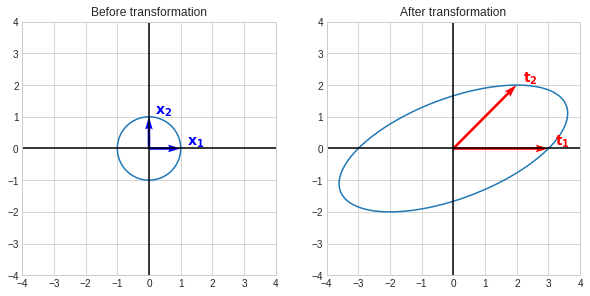

In [7]:
A = np.array([[3, 2],
              [0, 2]]) 
scaled_data = np.matmul(A, orignal_data.T).T
viz_group_trans(orignal_data, scaled_data)

The sample vectors $x_1$ and $x_2$ on the unit circle are transformed into $t_1$ and $t_2$ respectively, namely:

<br>$$t_1 = \mathbf{A}x_1 \qquad  t_2 = \mathbf{A}x_2$$<br>

From this example you can see that the multiplication with matrix $\mathbf{A}$ only changes the magnitude of vector $x_1$, but changes both of the direction and magnitude of vector $x_2$. This means $x_1=(1,0)$ is an eigenvector of matrix $\mathbf{A}$ with eigenvalue 3, but $x_2=(0,1)$ is not.

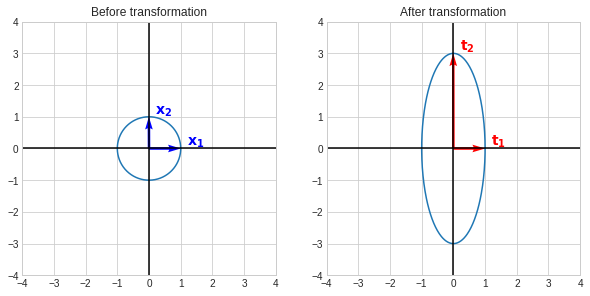

In [8]:
A = np.array([[1, 0],
              [0, 3]]) 
scaled_data = np.matmul(A, orignal_data.T).T
viz_group_trans(orignal_data, scaled_data)

In this case, both $x_1=(1,0)$ and $x_2=(0,1)$ are eigenvectors of matrix $\mathbf{A}$ with eigenvalues 1 and 3 respectively. Another thing you may already notice is: these two eigenvectors are along the major and minor axes of the eclipse (principal axes).

An eclipse can be thought of as a circle stretched or shrunk along its principal axes. In this example matrix $\mathbf{A}$ transforms the initial unit circle by stretching it along the direction of its eigenvectors: $x_1$ (minor axis) and $x_2$ (major axis), or $t_1$ and $t_2$ since they have the same direction with $x_1$ and $x_2$ respectively. This is a special property of symmetric matrix. 

- **Property 1:** A symmetric matrix transforms a vector by stretching or shrinking it along its eigenvectors by its corresponding eigenvalues. 

So when you have more stretching in the direction of an eigenvector, the eigenvalue corresponding to that eigenvector will be greater. That's why the eigenvector $x_2$ has a larger eigenvalue 3 than $x_1$.

Recall a **symmetric matrix** is a square matrix with property:

$$A_{i,j} = A_{j, i}$$

In this example:

$$A = \begin{bmatrix} 1 & 0 \\ 0 & 3 \end{bmatrix}$$

Is a $2*2$ symmetric matrix (elements on the main diagonal do not matter).

Another importatant property of symmetric metrices is: 
- **Property 2:** an $n×n$ symmetric matrix has $n$ linearly independent eigenvectors and are perpendicular to each other and form orthogonal vectors

## Calculate eigenvalues and eigenvectors with Numpy

Now Let's see the calculation of eigenvector and eigenvalues using Numpy and verify the examples above.

In [ ]:
from numpy import linalg as LA
A = np.array([[1, 0],
              [0, 3]]) 
w, v = LA.eig(A)

- `w` contains the eigenvalues, 
- `v` contains the corresponding eigenvectors, one eigenvector per column

In [ ]:
print(w)
print(v)

[1. 3.]
[[1. 0.]
 [0. 1.]]


The eigenvalue `w[0]` goes with the 0-th column of `v`. The eigenvalue `w[1]` goes with column 1, meaning the matrix: <br><br>

$$A = \begin{bmatrix} 1 & 0 \\ 0 & 3 \end{bmatrix}$$

has
1. **eigenvector:** $\begin{bmatrix} 1 \\0 \end{bmatrix}$ and the corresponding **eigenvalue:** 1
2. **eigenvector:** $\begin{bmatrix} 0 \\1 \end{bmatrix}$ and the corresponding **eigenvalue:** 3

This is consistent with our analysis above! **Note the eigenvectors are normalized so their l2 norms will always be 1.**

## Eigendecomposition for Symmetric Matrix

**Matrix decomposition** is a useful tool for reducing a matrix to their constituent parts in order to simplify a range of more complicated operations. Perhaps the most used type of matrix decomposition is the **eigendecomposition** that decomposes a matrix into eigenvectors and eigenvalues.

A $\color{red}{\text{symmetric matrix}}$ is orthogonally diagonalizable. It means for a $n×n$ symmetric matrix $\mathbf{A}$ with $n$ linearly independent eigenvectors $v_i$ and corresponding eigenvalues $\lambda_i$ , we can decompose it as:

<br>$$A = Q\Lambda Q^{-1}$$<br>

where $Q$ is the square $n × n$ matrix whose i-th column is the eigenvector $v_i$ of A, since $Q$ is formed from the eigenvectors of $A$,  it is guaranteed to be an **orthogonal matrix**, therefore $Q^{-1} = Q^T$. $\Lambda$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues, $\Lambda_{ii} = λ_i$. That is:

$$A = \begin{bmatrix} v_1 & v_2 & ... & v_n \end{bmatrix} \begin{bmatrix} 
\lambda_1 & 0 & ... & 0\\
0 & \lambda_2 & ... & 0\\
\vdots & \vdots & ... & \vdots\\
0 & 0 & ... & \lambda_n
\end{bmatrix} \begin{bmatrix} v_1^T \\ v_2^T \\ \vdots \\ v_n^T \end{bmatrix}$$

Let's go one step further:

$$A = \begin{bmatrix} \lambda_1v_1 & \lambda_2v_2 & ... & \lambda_nv_n \end{bmatrix} \begin{bmatrix} v_1^T \\ v_2^T \\ \vdots \\ v_n^T \end{bmatrix}
=\lambda_1v_1v_1^T + \lambda_2v_2v_2^T + ... + \lambda_nv_nv_n^T$$

So when we apply this matrix $A$ to some vector $x$:

<br> $$Ax = \lambda_1v_1v_1^Tx + \lambda_2v_2v_2^Tx + ... + \lambda_nv_nv_n^Tx$$ <br>


Let's illustrate this concept with the earlier example:

$$A = \begin{bmatrix} 1 & 0 \\ 0 & 3 \end{bmatrix}$$

**eigenvector:** $\begin{bmatrix} 1 \\0 \end{bmatrix}$ and the corresponding **eigenvalue:** 1 <br>
**eigenvector:** $\begin{bmatrix} 0 \\1 \end{bmatrix}$ and the corresponding **eigenvalue:** 3

Thus, it can be decomposed as:

$$A = \begin{bmatrix} 1 & 0 \\ 0 & 3 \end{bmatrix} = 
\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 
1 & 0 \\
0 & 3
\end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & 3 \end{bmatrix} 
$$

let's verify this with code:


In [21]:
Q = np.array([[1, 0], [0, 1]])
lamda = np.array([[1, 0], [0, 3]])
Q_transpose = Q.T
Q_inverse = np.linalg.inv(Q)
print(np.matmul(np.matmul(Q, lamda), Q_transpose), '\n')
print(np.matmul(np.matmul(Q, lamda), Q_inverse))

[[1 0]
 [0 3]] 

[[1. 0.]
 [0. 3.]]


Great! now let's dig a little deeper:

In [87]:
A = np.array([[1, 0],
              [0, 3]]) 
v1 = np.array([[1], [0]])
v2 = np.array([[0], [1]])
lamda1 = 1
lamda2 = 3

In [88]:
# Apply transformation A to a random vector x
x = np.array([[2], [1]])
Ax = np.matmul(A, x)
print(Ax)

[[2]
 [3]]


In [89]:
# Another expression
vvt1x = np.matmul(np.matmul(v1, v1.T), x)
vvt2x = np.matmul(np.matmul(v2, v2.T), x)
print(lamda1*vvt1x + lamda2*vvt2x)

[[2]
 [3]]


It works as expect! Actually, given $v$ is a unit vector, multiplying $vv^T$ by $x$ will give the **orthogonal projection of $x$ onto $v$**, so each of the matrices $v_iv_i^T$ is called the **projection matrix**. You can skip the code in the next cell and go straight to its visualization.

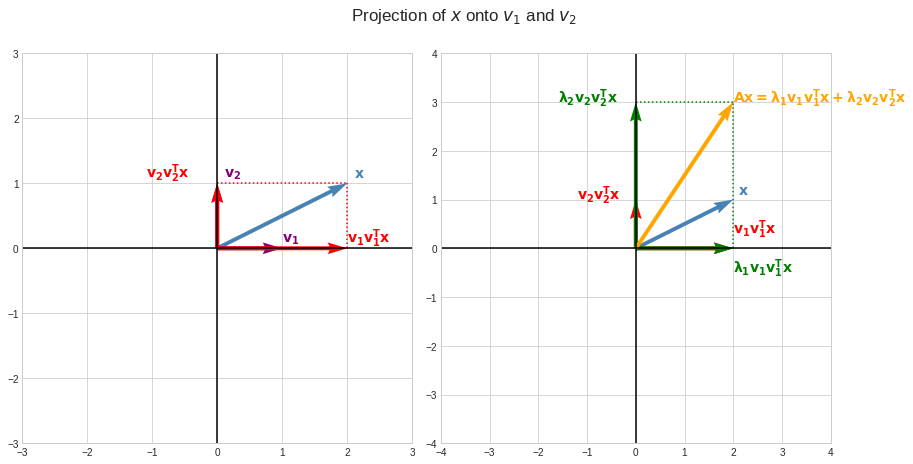

In [152]:
origin = [0], [0]   # origin point
fig = plt.figure(figsize=(13, 7)) 

ax1 = fig.add_subplot(1, 2, 1)  
ax1.quiver(*origin, x[0, 0], x[1, 0], 
          color='steelblue', scale_units='xy', 
          width=0.01, angles='xy', scale=1)
ax1.quiver(*origin, v1[0, 0], v1[1, 0], linestyle='dashed',
          color='purple', scale_units='xy', linewidth=1,
          width=0.01, angles='xy', scale=1)
ax1.quiver(*origin, vvt1x[0, 0], vvt1x[1, 0], 
          color='red', scale_units='xy', 
          width=0.01, angles='xy', scale=1)
ax1.quiver(*origin, v2[0, 0], v2[1, 0], 
          color='purple', scale_units='xy', 
          width=0.01, angles='xy', scale=1)
ax1.quiver(*origin, vvt2x[0, 0], vvt2x[1, 0],
          color='red', scale_units='xy', 
          width=0.01, angles='xy', scale=1)

ax1.plot([vvt1x[0, 0], x[0, 0]], [vvt1x[1, 0], x[1, 0]],
         linestyle=':', color='red')
ax1.plot([vvt2x[0, 0], x[0, 0]], [vvt2x[1, 0], x[1, 0]],
         linestyle=':', color='red')
ax1.text(x[0, 0]+0.1, x[1, 0]+0.1, "$\mathbf{x}$",
         color='steelblue', fontsize=14)
ax1.text(v1[0, 0], v1[1, 0]+0.1, "$\mathbf{v_1}$",
         color='purple', fontsize=14)
ax1.text(vvt1x[0, 0], vvt1x[1, 0]+0.1,
         "$\mathbf{v_1v_1^Tx}$", color='red', fontsize=14)
ax1.text(v2[0, 0]+0.1, v2[1, 0]+0.1, 
         "$\mathbf{v_2}$", color='purple', fontsize=14)
ax1.text(vvt2x[0, 0]-1.1, vvt2x[1, 0]+0.1, 
         "$\mathbf{v_2v_2^Tx}$", color='red', fontsize=14)

ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.set_aspect('equal')
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

ax2 = fig.add_subplot(1, 2, 2)  
ax2.quiver(*origin, x[0, 0], x[1, 0], 
          color='steelblue', scale_units='xy', 
          width=0.01, angles='xy', scale=1)
ax2.quiver(*origin, vvt1x[0, 0], vvt1x[1, 0],
          color='red', scale_units='xy', 
          width=0.01, angles='xy', scale=1)
ax2.quiver(*origin, vvt2x[0, 0], vvt2x[1, 0], 
          color='red', scale_units='xy', 
          width=0.01, angles='xy', scale=1)
ax2.quiver(*origin, lamda1*vvt1x[0, 0], lamda1*vvt1x[1, 0], 
          color='green', scale_units='xy', 
          width=0.01, angles='xy', scale=1)
ax2.quiver(*origin, lamda2*vvt2x[0, 0], lamda2*vvt2x[1, 0], 
          color='green', scale_units='xy', 
          width=0.01, angles='xy', scale=1)
ax2.quiver(*origin, lamda1*vvt1x[0, 0]+lamda2*vvt2x[0, 0], 
           lamda1*vvt1x[1, 0]+lamda2*vvt2x[1, 0], 
           color='orange', scale_units='xy', 
           width=0.01, angles='xy', scale=1)
ax2.plot([lamda1*vvt1x[0, 0], lamda1*vvt1x[0, 0]+lamda2*vvt2x[0, 0]],
         [lamda1*vvt1x[1, 0], lamda1*vvt1x[1, 0]+lamda2*vvt2x[1, 0]], 
         linestyle=':', color='green')
ax2.plot([lamda2*vvt2x[0, 0], lamda1*vvt1x[0, 0]+lamda2*vvt2x[0, 0]],
         [lamda2*vvt2x[1, 0], lamda1*vvt1x[1, 0]+lamda2*vvt2x[1, 0]],
         linestyle=':', color='green')

ax2.text(x[0, 0]+0.1, x[1, 0]+0.1, 
         "$\mathbf{x}$", color='steelblue', fontsize=14)
ax2.text(vvt1x[0, 0], vvt1x[1, 0]+0.3, 
         "$\mathbf{v_1v_1^Tx}$", color='red', fontsize=14)
ax2.text(vvt2x[0, 0]-1.2, vvt2x[1, 0], 
         "$\mathbf{v_2v_2^Tx}$", color='red', fontsize=14)
ax2.text(lamda1*vvt1x[0, 0], lamda1*vvt1x[1, 0]-0.5, 
         "$\mathbf{\lambda_1v_1v_1^Tx}$", color='green', fontsize=14)
ax2.text(lamda2*vvt2x[0, 0]-1.6, lamda2*vvt2x[1, 0], 
         "$\mathbf{\lambda_2v_2v_2^Tx}$", color='green', fontsize=14)
ax2.text(lamda1*vvt1x[0, 0]+lamda2*vvt2x[0, 0], 
         lamda1*vvt1x[1, 0]+lamda2*vvt2x[1, 0], 
         "$\mathbf{Ax=\lambda_1v_1v_1^Tx+\lambda_2v_2v_2^Tx}$", 
         color='orange', fontsize=14)

ax2.set_xlim([-4, 4])
ax2.set_ylim([-4, 4])
ax2.set_aspect('equal')
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
fig.suptitle('Projection of $x$ onto $v_1$ and $v_2$', fontsize=17)
plt.tight_layout()
plt.show()

The eigenvalues play an important role here since they can be thought of as a multiplier. The projection matrix projects $x$ onto each $v_i$,and scales the length of the vector projection by factor eigenvalue. The bigger the eigenvalue, the bigger the length of the resulting vector. Assume all the eigenvalues $\lambda_i$ have been sorted in descending order:

<br> $$A = \lambda_1v_1v_1^T + \lambda_2v_2v_2^T + ... + \lambda_nv_nv_n^T$$ <br>

with

$$\lambda_1 \geq \lambda_2 \geq ...  \geq \lambda_n$$<br>

We can simply take the top $k$ projection vectors to aprroximate the original symmetric matrix $A$:

<br> $$A \approx \lambda_1v_1v_1^T + \lambda_2v_2v_2^T + ... + \lambda_kv_kv_k^T$$ <br>

If in the original matrix $A$, the remaining $(n-k)$ eigenvalues that we leave out are very small and close to zero, then the approximated matrix is very similar to the original matrix, and we have a good approximation. This method is widely used to map high-dimensional data into a lower dimension space. However, it only works for symmetric matrices. 

Now you have learned about eigendecomposition. In the next note I will introduce you the **Singular Value Decomposition** (SVD) which will work for non-symmetic matrix.